<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
## <font size="5">*Alexander A. Nazarov, 2022*
# <center> <font size="6"> ***Проверка нормальности распределения с использованием критерия Эппса-Палли средствами Python </p>Checking the normality of the distribution using the Epps-Pulley test using Python***
***

In [50]:
import time
start_time = time.time()

Подключение модулей и библиотек:

In [51]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels as sm
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Настройки numpy
np.set_printoptions(precision = 4, floatmode='fixed')

# Настройки Pandas
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.22.2
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.2
Текущая версия модуля sympy:       1.9


In [52]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\GitHub\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [53]:
# Константы
INCH = 25.4    # мм/дюйм
DecPlace = 5    # number of decimal places - число знаков после запятой

Доверительная вероятность и уровень значимости:

In [54]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <u> <font size="5"> ***ПОСТАНОВКА ЗАДАЧИ***

**Критерий Эппса-Палли** - один из критериев проверки нормальности распределения, основанный на сравнении эмпирической и теоретической характеристических функций.

Критерий предложен в 1983 г. (см. Epps, T. W., and Pulley, L. B. (1983). A test for normality based on the empirical characteristic function. Biometrika 70, 723–726). В настоящее время данный критерий рекомендован к использованию в ГОСТ Р ИСО 5479-2002 [1, с.13], однако среди тестов, включенных в модуль **scipy.stats**, данный критерий, к сожалению, отсутствует.

Детальное исследование критерия Эппса-Палли проведено в работах Б.Ю. Лемешко ([2], [3] и др.). Так, было установлено [3, с.31, 80], что по мощности критерий Эппса-Палли превосходит критерии Шапиро-Уилка, Д'Агостино, Дэвида-Хартли-Пирсона, однако имеет недостаток - **при малых объемах выборки неспособен отличать от нормального закона распределения с более плоскими плотностями распределений (с коэффициентом эксцесса Es < 2)**; впрочем этот недостаток также свойственен и критерию Шапиро-Уилка.

Также про достоинства критерия Эппса-Палли - см., например, http://www.mathnet.ru/php/archive.phtml?wshow=paper&jrnid=znsl&paperid=7090&option_lang=rus.

В ГОСТ Р ИСО 5479-2002 критерий Эппса-Палли рекомендуется применять при n ≥ 8, табличные значения приведены для 8 ≤ n ≤ 200. В работе Б.Ю. Лемешко [3, с33] критерий рекомендуется применять при n > 15, табличные значения приведены для 8 ≤ n ≤ 1000.

Представляет интерес рассмотреть способы реализации критерия Эппса-Палли средствами **python**, добавив это весьма неплохой критерий в инструментарий специалиста **DataScience**.

### <center> <u> <font size="5"> ***ФОРМИРОВАНИЕ ИСХОДНЫХ ДАННЫХ***

В качестве исходных данных рассмотрим примеры, разобранные в работе Лемешко Б.Ю. [3, с.138-146], а именно:
* результаты измерения средней плотности Земли (эксперимент Кавендиша)
* результаты измерения заряда электрона (эксперимент Милликена)
* результаты измерения скорости света (эксперимент Майкельсона)
* результаты измерения скорости света (эксперимент Ньюкомба)

Рассмотрим для начала результаты измерения средней плотности Земли, полученные Генри Кавендишем, (г/см3) [3, с.139, табл.5.1]:

In [55]:
X = np.array([
    5.50, 5.55, 5.57, 5.34, 5.42, 5.30, 5.61, 5.36, 5.53, 5.79,
    5.47, 5.75, 4.88, 5.29, 5.62, 5.10, 5.63, 5.68, 5.07, 5.58,
    5.29, 5.27, 5.34, 5.85, 5.26, 5.65, 5.44, 5.39, 5.46
    ])

Сохраняем данные в **csv**-файл:

In [56]:
np.savetxt('data/Cavendish_Experiment.csv', X)

Выполним предварительную визуализацию с помощью пользовательской функции **graph_hist_boxplot_probplot_sns**, которая позволяет визуализировать исходную выборку путем одновременного построения гистограммы, коробчатой диаграммы и вероятностного графика, тем самым давая возможность исследователю одним взглядом оценить свойства выборки. Данная функция загружается из пользовательского модуля **my_module__stat.py** (функция **graph_hist_boxplot_probplot_sns** и модуль **my_module__stat.py** доступны в моем репозитории на GitHub https://github.com/AANazarov/MyModulePython).

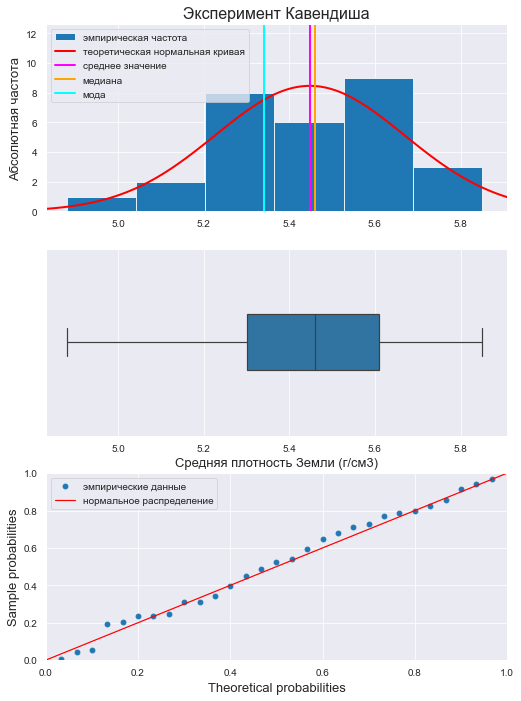

In [57]:
graph_hist_boxplot_probplot_sns(
    data=X,
    graph_inclusion='hbp',    # выбор вида визуализации: h - hist, b - boxplot, p - probplot
    title_axes='Эксперимент Кавендиша', title_axes_fontsize=16,
    data_label='Средняя плотность Земли (г/см3)')    

### <center> <u> <font size="5"> ***ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ПО КРИТЕРИЮ ЭППСА-ПАЛЛИ***

<u>1. Расчет статистики критерия Эппса-Палли</u>

Определим расчетное значение статистики критерия Эппса-Палли по методике, приведенной в ГОСТ Р ИСО 5479-2002.

Объем выборки:

In [58]:
N = len(X)
print(f'N = {N}')

N = 29


Находим характеристики выборки - среднее арифметическое и центральный момент 2-го порядка (дисперсия для генеральной совокупности, без поправки на смещенность):

In [59]:
# среднее арифметическое
X_mean = X.mean()
print(f'Xmean = {X_mean}')

# центральный момент 2-го порядка
m2 = np.var(X, ddof = 0)
print(f'm2 = {m2}')

Xmean = 5.4479310344827585
m2 = 0.04713365041617124


Вычислим величину **A**:

In [60]:
A = sqrt(2) * np.sum([exp(-(X[i] - X_mean)**2 / (4*m2)) for i in range(N)])
print(f'A = {A}')

A = 33.570973878449124


Вычислим величину **B**:

In [61]:
B = 2/N * np.sum(
    [np.sum([exp(-(X[j] - X[k])**2 / (2*m2)) for j in range(0, k)]) 
     for k in range(1, N)])
print(f'B = {B}')

B = 15.879733019372317


Расчетное значение статистики критерия Эппса-Палли:

In [62]:
TEP_calc = 1 + N / sqrt(3) + B - A
print(f'Расчетное значение статистики критерия Эппса-Палли: TEP_calc = {TEP_calc}')

Расчетное значение статистики критерия Эппса-Палли: TEP_calc = 0.051916947422341764


Рассчитанное нами значение совпадает с приведенным в источнике [3, с.143].

<u>2. Определение табличных значений статистики критерия Эппса-Палли</u>

В табл.12 ГОСТ Р ИСО 5479-2002 приведены табличные значения статистики критерия Эппса-Палли для 8 ≤ n ≤ 200:

![Getting Started](Image/Image_01.png)

В работе Б.Ю. Лемешко [3, с.185] приведены табличные значения статистики критерия Эппса-Палли для 8 ≤ n ≤ 1000:

![Getting Started](Image/Image_01_1.png)

Сформируем csv-файл с табличными значениями (для дальнейшего использования), поместим его в папку **table** в том же каталоге, что и наш рабочий файл ***.ipynb**:

In [63]:
Tep_table_df = pd.read_csv(
    filepath_or_buffer='table/Tep_table.csv',
    sep=';',
    index_col='n')
display(Tep_table_df)

,p=0.9,p=0.95,p=0.975,p=0.99
n,,,,
8,0.2710,0.3470,0.4270,0.5280
9,0.2750,0.3520,0.4310,0.5370
10,0.2790,0.3540,0.4350,0.5440
15,0.2840,0.3660,0.4480,0.5590
20,0.2870,0.3680,0.4520,0.5650
25,0.2870,0.3700,0.4540,0.5700
30,0.2890,0.3720,0.4570,0.5720
40,0.2890,0.3730,0.4580,0.5760
50,0.2900,0.3740,0.4600,0.5770


Промежуточные значения определим с помощью интерполяции - для этого создадим пользовательскую функцию:

In [64]:
def Tep_table(n, p_level=0.95):
    # загружаем табличные значения статистики критерия Эппса-Палли
    Tep_table_df = pd.read_csv(
        filepath_or_buffer='table/Tep_table.csv',
        sep=';',
        index_col='n')
    # выбираем величину доверительной вероятности
    p_level_dict = {
        0.9:   Tep_table_df.columns[0],
        0.95:  Tep_table_df.columns[1],
        0.975: Tep_table_df.columns[2],
        0.99:  Tep_table_df.columns[3]}
    # линейная интерполяция
    N = Tep_table_df.index
    T = Tep_table_df[p_level_dict[p_level]]
    f_lin = sci.interpolate.interp1d(N, T)
    result = float(f_lin(n))    
    return result

Визуализация табличных значений статистики критерия Эппса-Палли:

Text(0, 0.5, 'Tep(n)')

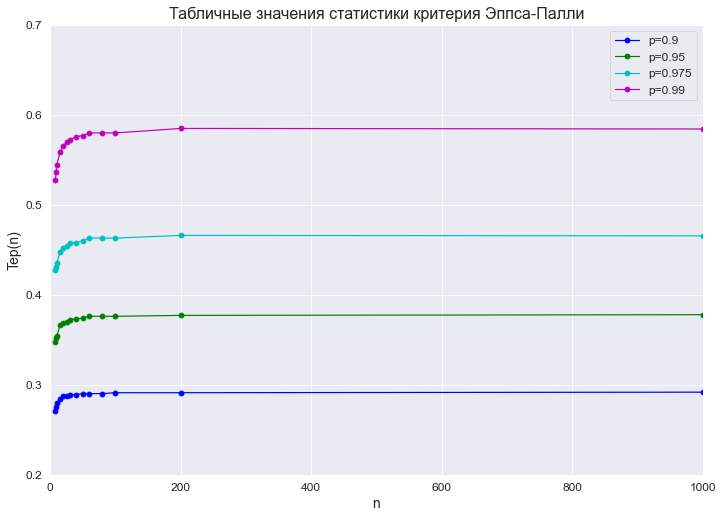

In [65]:
fig, axes = plt.subplots(figsize=(297/INCH, 210/INCH))
axes.set_title('Табличные значения статистики критерия Эппса-Палли', fontsize=16)
axes.plot(Tep_table_df.index, Tep_table_df['p=0.9'].values, 'ob-', label='p=0.9')
axes.plot(Tep_table_df.index, Tep_table_df['p=0.95'].values, 'og-', label='p=0.95')
axes.plot(Tep_table_df.index, Tep_table_df['p=0.975'].values, 'oc-', label='p=0.975')
axes.plot(Tep_table_df.index, Tep_table_df['p=0.99'].values, 'om-', label='p=0.99')
axes.legend(loc="best", fontsize=12)
axes.set_xlim(0, 1000)
axes.set_ylim(0.2, 0.7)
axes.set_xlabel('n')
axes.set_ylabel('Tep(n)')

<u>3. Аппроксимация предельных распределений статистики критерия Эппса-Палли</u>

В работе Б.Ю. Лемешко [3, с.32] указано, что распределение статистики критерия Эппса-Палли достаточно хорошо аппроксимируется **бета-распределением III рода**, плотность распределения которого имеет вид:

![Getting Started](Image/Image_02.png)

Там же указано, что при 15 < n < 50 можно использовать бета-распределениями III рода с параметрами: 

    θ0 = 1.8645    θ1 = 2.5155    θ2 = 5.8256    θ3 = 0.9216    θ4 = 0.0008

При n ≥ 50 следует пользоваться предельным распределением с параметрами:

    θ0 = 1.7669    θ1 = 2.1668    θ2 = 6.7594    θ3 = 0.91    θ4 = 0.0016

Теперь для выполнения расчетов нам необходимо сопоставить встроенные возможности **python** с указанным выше распределением.

Библиотека **scipy** дает нам возможность работать с бета-распределением (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html), плотность которого имеет вид:

![Getting Started](Image/Image_03.png)

Так как бета-функция выражается через гамма-функцию:

![Getting Started](Image/Image_04.png)

то очевидно, что мы имеем дело с классическим бета-распределением, разобранным в множестве источников (например, [4, 5, 6]). При этом во всех указанных источниках упоминаний про **бета-распределение III рода** нет. Соответственно, и **python** не имеет встроенных возможностей для работы с данным распределением.

Следует разобраться более подробно с этим распределением. Это представляет интерес еще и потому, что в работах [2], [3], посвященных исследованию распределений подобная ситуация встречается часто - распределения статистик различных критериев описываются малораспространенными видами распределений, которые не реализованы в **python**, то есть с подобной проблемой при решении других задач исследователь может столкнуться. Ну об этом напишем в другой раз, в этой области огромное количество интересных и полезных методов и задач.

Кстати, на основании исследований Б.Ю. Лемешко и его коллектива были разработаны рекомендации по стандартизации:

* Р 50.1.033-2001. Рекомендации по стандартизации. Прикладная статистика. Правила проверки согласия опытного распределения с теоретическим. Часть I. Критерии типа хи-квадрат.
* Р 50.1.037-2002. Рекомендации по стандартизации. Прикладная статистика. Правила проверки согласия опытного распределения с теоретическим. Часть II. Непараметрические критерии.

На сегодняшний день они имеют статус действующих.

Итак, в отечественной литературе по прикладной статистике понятие **бета-распределения III рода** (а, соответственно I и II рода) до начала 1990-х гг., мне обнаружить не удалось. 
В интернете информации тоже немного, хотя кое-что найти можно (например, https://www.r-bloggers.com/2019/07/the-beta-distribution-of-the-third-kind-or-generalised-beta-prime/).

Более или менее подробный теоретический материал удалось обнаружить в кандидатской диссертации Постовалова С.Н. [7, с.92-95, 111-115], научным руководителем которого был Б.Ю. Лемешко. Постовалов С.Н. в своей работе [7, с.113] ссылается на работу Губарева В.В. [8], в которой и приводятся справочные данные о **бета-распределения III рода** [8, табл.4.3, п.27, с.164], при этом данной распределение отмечено примечанием **"введено автором"**. То есть получается, что <u>понятие **бета-распределения III рода** предложено Губаревым В.В. в 1992 г.</u> и, очевидно, характерно только для отечественной, в частности, новосибирской, школы прикладной статистики? Так это или иначе, но неудивительно, что в **python** это распределение не реализовано. Реализуем сами.

Итак, Постовалов С.Н. в своей работе [7, с.92] дает следующее определение **бета-распределения III рода**: если рассмотреть обобщенное семейство бета-распределений, функция распределения которых имеет вид:

![Getting Started](Image/Image_05.png) где ![Getting Started](Image/Image_06.png) ![Getting Started](Image/Image_07.png)

то, используя **генерирующую функцию** вида:

![Getting Started](Image/Image_08.png)

мы и получим **бета-распределение III рода**.

То есть мы видим, что с помощью генерирующей функции мы можем перейти от обычного бета-распределения (или бета-распределения I рода, как оно именуется в [7]), которое реализовано в библиотеке **scipy**, к бета-распределению III рода, что нам и требуется.

<u>4. Реализация бета-распределения III рода средствами **python** </u>

Функция обычного бета-распределения (I рода) реализована в модуле **scipy.stat** следующим образом:

In [66]:
сdf_beta_I = lambda x, a, b: sci.stats.beta.cdf(x, a, b, loc=0, scale=1)

Перейдем к функции бета-распределения III рода с помощью генерирующей функции [7, с.92]:

In [67]:
g_beta_III = lambda z, δ: δ*z / (1+(δ-1)*z)

Подставляя **g_beta_III** в **сdf_beta_I**, получим функцию бета-распределения III рода:

In [68]:
cdf_beta_III = lambda x, θ0, θ1, θ2, θ3, θ4: сdf_beta_I(g_beta_III((x - θ4)/θ3, θ2), θ0, θ1)

При этом важно идентифицировать параметры функции распределения, так как в разных источниках используются различные обозначения. В рассматриваемом нами источнике у Б.Ю. Лемешко [3] используются параметры θ0, θ1, θ2, θ3, θ4, будем идентифицировать их:

![Getting Started](Image/Image_08_1.png)

График функции бета-распределения III рода:

In [69]:
# набор параметров распределения для 15 < n < 50
θ_1 = (1.8645, 2.5155, 5.8256, 0.9216, 0.0008)
# набор параметров распределения для n >= 50
θ_2 = (1.7669, 2.1668, 6.7594, 0.91, 0.0016)

Text(0, 0.5, 'cdf_beta_III(x)')

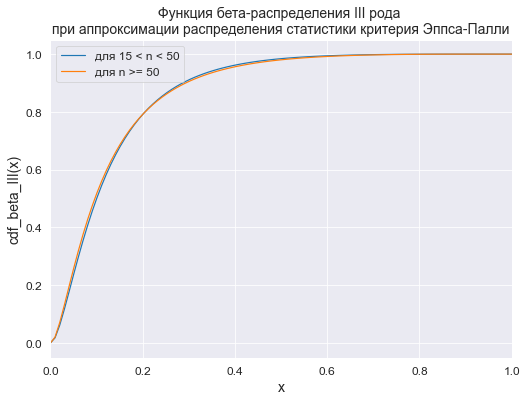

In [70]:
fig, axes = plt.subplots(figsize=(210/INCH, 297/INCH/2))
axes.set_title('Функция бета-распределения III рода \nпри аппроксимации распределения статистики критерия Эппса-Палли', fontsize=14)
xmin = 0
xmax = 1
x = np.linspace(xmin, xmax, 100)
axes.plot(x, cdf_beta_III(x, θ_1[0], θ_1[1], θ_1[2], θ_1[3], θ_1[4]), label='для 15 < n < 50')
axes.plot(x, cdf_beta_III(x, θ_2[0], θ_2[1], θ_2[2], θ_2[3], θ_2[4]), label='для n >= 50')
axes.legend(loc="best", fontsize=12)
axes.set_xlim(xmin, xmax)
axes.set_xlabel('x')
axes.set_ylabel('cdf_beta_III(x)')

<u>5. Плотность бета-распределения III рода</u>

Для использования критерия Эппса-Палли плотность плотности распределения нам, по сути, не нужна, но, тем не менее, найдем ее, так сказать, для общей демонстрации возможностей.

Для нахождения плотности бета-распределения III рода мы не можем воспользоваться встроенными возможностями модуля **scipy.stat**. Придется воспользоваться определением плотности распределения как первой производной от функции распределения. При этом у нас не получится найти эту производную в общем виде, пользуясь библиотекой символьных вычислений **sympy**, поэтому дифференцировать будем численно, с помощью функции **scipy.misc.derivative**:

In [71]:
# для 15 < n < 50
cdf_beta_III_part1 = lambda x: cdf_beta_III(x, θ_1[0], θ_1[1], θ_1[2], θ_1[3], θ_1[4])
pdf_beta_III_part1 = lambda x: sci.misc.derivative(cdf_beta_III_part1, x, dx=1e-6)

# для n >= 50
cdf_beta_III_part2 = lambda x: cdf_beta_III(x, θ_2[0], θ_2[1], θ_2[2], θ_2[3], θ_2[4])
pdf_beta_III_part2 = lambda x: sci.misc.derivative(cdf_beta_III_part2, x, dx=1e-6)

Text(0, 0.5, 'pdf_beta_III(x)')

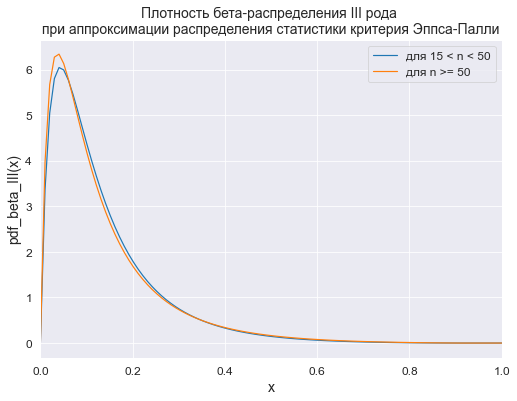

In [72]:
fig, axes = plt.subplots(figsize=(210/INCH, 297/INCH/2))
axes.set_title('Плотность бета-распределения III рода \nпри аппроксимации распределения статистики критерия Эппса-Палли', fontsize=14)
xmin = 0
xmax = 1
x = np.linspace(xmin, xmax, 100)
axes.plot(x, pdf_beta_III_part1(x), label='для 15 < n < 50')
axes.plot(x, pdf_beta_III_part2(x), label='для n >= 50')
axes.legend(loc="best", fontsize=12)
axes.set_xlim(xmin, xmax)
axes.set_xlabel('x')
axes.set_ylabel('pdf_beta_III(x)')

<u>Небольшой Offtop - про тестирование математических расчетов</u>

Самопроверка при выполнении математических расчетов - это, как говорится, основа основ... Ошибиться может каждый. На мой взгляд, лучший способ самопроверки - при выполнении какого-либо тестового расчета выполнить его разными способами, или в разных математических пакетах. Это сильно повышает вероятность отследить ошибки.

В нашем случае, мы выполняем не такие уж сложные расчеты, но с использованием специальных функций и встроенных возможностей **python**. Функции имеют большое количество параметров, кроме того, в разных математических пакетах методика расчета специальных функций может отличаться. Проверить себя необходимо.

Рассчитаем значение функции бета-распределения III рода для некой условной точки **x=0.45, a=0.65, b=0.85** различными способами:
* с использованием встроенных возможностей модуля **scipy.stat** 
* по определению бета-функции с использованием модуля специальных функций **scipy.special** (https://docs.scipy.org/doc/scipy/reference/special.html), в котором имеется функция **scipy.special.betainc**.

Сравним результаты:

In [73]:
# с использованием встроенных возможностей модуля scipy.stat
print(сdf_beta_I(x=0.45, a=0.65, b=0.85))
# с использованием модуля специальных функций scipy.special
print(sci.special.betainc(0.65, 0.85, 0.45))

0.5436765452257781
0.5436765452257777


Как видим, результаты практически совпадают.

Рассчитаем теперь значение плотности бета-распределения III рода для точки **x=0.45** в двух вариантах: для 15 < n < 50 и для n >= 50. Эта проверка уже сложнее, так как средствами **python** мы получили плотность распределения только одним способом - через численное дифференцирование:

In [74]:
print(pdf_beta_III_part1(0.45))
print(pdf_beta_III_part2(0.45))

0.2186725617803198
0.23585436442763452


Второе решение получим с помощью альтернативного математического пакета - системы компьютерной алгебры **Maxima**. Далее представлен фрагмент программного кода:

![Getting Started](Image/Image_09_0_1.png)
![Getting Started](Image/Image_09_0_2.png)

Как видим, результаты расчетов также совпадают.

В системе **Maxima** продублирован полный комплекс расчетов из данного разбора (программный код доступен в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods/tree/master/Epps-Pally%20test).

При этом, как я писал выше, мы сталкиваемся с отличием в методике расчетов специальных функций в различных математических пакетах: в системе **Maxima** неполная бета-функция рассчитывается, в отличие от **scipy**, без умножения на множитель ![Getting Started](Image/Image_09.png). В общем, будьте бдительны, товарищи!

Кстати, о системе компьютерной алгебры **Maxima** (https://sourceforge.net/projects/maxima/files/), ее возможностях, достоинствах, недостатках можно написать отдельно. Этот математический пакет с открытой лицензией нельзя сказать, что очень сильно распространен, хотя о нем написано немало книг, статей, методических указаний, и их количество в последние годы растет.

Из своего собственного опыта я абсолютно убежден, что любому специалисту, деятельность которого так или иначе связана с математическими расчетами, владеть какой-либо системой компьютерной алгебры необходимо, а **Maxima** имеет для этого немало достоинств:
* открытая лицензия;
* очень большой математический инструментарий;
* обширные возможности для символьных вычислений (например, выше было продемонстрировано, как **Maxima** позволяет путем подстановки получить символьное выражение для рассматриваемой нами выше функции бета-распределения III рода, а затем, продифференцировав ее, получить символьное выражение для плотности распределения);
* удобство использования (лучше, чем в **Mathlab** или **Scilab**, но хуже, чем в **Mathcad**);
* компактность кода (одна страница кода в **Maxima** гораздо информативней, чем, например, в **Scilab**);
* встроенный язык программирования.

Среди недостатков можно отметить:
* низкое быстродействие;
* необходимость адаптироваться к несколько специфическому синтаксису (например, в **Maxima** вместо символа операции присваивания значения переменной "=" используется ":");
* неприспособленность для решения задач высокой размерности (при решении отдельных задач прикладной статистики с объемами выборки в несколько сотен **Maxima** начинает вполне ощутимо "тормозить", а при объеме данных в нескольких тысяч - **Maxima** лучше не применять вовсе).
  
По-моему личному мнению, **Maxima** прекрасно подходит как средство тестирования математических расчетов. Впрочем, каждый исследователь сам выбирает для себя инструменты по душе.

Ну, подробнее об этом, напишем отдельно, в другой раз, а пока вернемся к нашей задаче.

<u>6. Проверка гипотезы о нормальности распределения по критерию Эппса-Палли</u>

Проверка гипотезы на основании расчетного и табличного значения статистики критерия:

In [75]:
DecPlace = 5    # точность вывода

print(f'Расчетное значение статистики критерия Эппса-Палли: TEP_calc = {round(TEP_calc, DecPlace)}')

TEP_table = Tep_table(N, p_level=0.95)
print(f'Табличное значение статистики критерия Эппса-Палли: TEP_table = {round(TEP_table, DecPlace)}')

if TEP_calc <= TEP_table:
        conclusion_EP_test = f"Так как TEP_calc = {round(TEP_calc, DecPlace)} <= TEP_table = {round(TEP_table, DecPlace)}" + \
            ", то гипотеза о нормальности распределения по критерию Эппса-Палли ПРИНИМАЕТСЯ"
else:
    conclusion_EP_test = f"Так как TEP_calc = {round(TEP_calc, DecPlace)} > TEP_table = {round(TEP_table, DecPlace)}" + \
            ", то гипотеза о нормальности распределения по критерию Эппса-Палли ОТВЕРГАЕТСЯ"
    
print(conclusion_EP_test)

Расчетное значение статистики критерия Эппса-Палли: TEP_calc = 0.05192
Табличное значение статистики критерия Эппса-Палли: TEP_table = 0.3716
Так как TEP_calc = 0.05192 <= TEP_table = 0.3716, то гипотеза о нормальности распределения по критерию Эппса-Палли ПРИНИМАЕТСЯ


Проверка гипотезы на основании расчетного и заданного уровня значимости:

In [76]:
if 15 < N < 50:
    a_TEP_calc = 1 - cdf_beta_III(TEP_calc, θ_1[0], θ_1[1], θ_1[2], θ_1[3], θ_1[4])
elif N >= 50:
    a_TEP_calc = 1 - cdf_beta_III(TEP_calc, θ_2[0], θ_2[1], θ_2[2], θ_2[3], θ_2[4])    
print(f'Расчетное (достигнутое) значение уровня значимости: a_TEP_calc = {round(a_TEP_calc, DecPlace)}')

print(f'Заданное значение уровня значимости: a_level = {round(a_level, DecPlace)}')

if a_TEP_calc > a_level:
        conclusion_EP_test = f"Так как a_calc = {round(a_TEP_calc, DecPlace)} > a_level = {round(a_level, DecPlace)}" + \
            ", то гипотеза о нормальности распределения по критерию Эппса-Палли ПРИНИМАЕТСЯ"
else:
    conclusion_EP_test = f"Так как a_calc = {round(a_TEP_calc, DecPlace)} <= a_level = {round(a_level, DecPlace)}" + \
            ", то гипотеза о нормальности распределения по критерию Эппса-Палли ОТВЕРГАЕТСЯ"

print(conclusion_EP_test)

Расчетное (достигнутое) значение уровня значимости: a_TEP_calc = 0.75339
Заданное значение уровня значимости: a_level = 0.05
Так как a_calc = 0.75339 > a_level = 0.05, то гипотеза о нормальности распределения по критерию Эппса-Палли ПРИНИМАЕТСЯ


Видим, что расчетное значение уровня значимости **a_TEP_calc = 0.75339** практически совпадает с примером в первоисточнике ([3, с.143]): **0.734**.

### <center> <u> <font size="5"> ***СОЗДАНИЕ ПОЛЬЗОВАТЕЛЬСКОЙ ФУНКЦИИ ДЛЯ РЕАЛИЗАЦИИ ТЕСТА ЭППСА-ПАЛЛИ***

Для практической работы целесообразно все вышеприведенные расчеты реализовать в виде пользовательской функции **Epps_Pulley_test**.

Данная функция выводят результаты анализа в виде DataFrame, что удобно для визуального восприятия и дальнейшего использования результатов анализа (впрочем, способ вывода - на усмотрение каждого исследователя).

In [77]:
def Epps_Pulley_test(data, p_level=0.95):
    a_level = 1 - p_level
    X = np.array(data)
    N = len(X)
    
    # аппроксимация предельных распределений статистики критерия
    сdf_beta_I = lambda x, a, b: sci.stats.beta.cdf(x, a, b, loc=0, scale=1)
    g_beta_III = lambda z, δ: δ*z / (1+(δ-1)*z)
    cdf_beta_III = lambda x, θ0, θ1, θ2, θ3, θ4: сdf_beta_I(g_beta_III((x - θ4)/θ3, θ2), θ0, θ1)
    # набор параметров распределения
    θ_1 = (1.8645, 2.5155, 5.8256, 0.9216, 0.0008)    # для 15 < n < 50
    θ_2 = (1.7669, 2.1668, 6.7594, 0.91, 0.0016)    # для n >= 50
    
    if N >= 8:
        # среднее арифметическое
        X_mean = X.mean()
        # центральный момент 2-го порядка
        m2 = np.var(X, ddof = 0)
        # расчетное значение статистики критерия
        A = sqrt(2) * np.sum([exp(-(X[i] - X_mean)**2 / (4*m2)) for i in range(N)])
        B = 2/N * np.sum(
            [np.sum([exp(-(X[j] - X[k])**2 / (2*m2)) for j in range(0, k)]) 
             for k in range(1, N)])
        s_calc_EP = 1 + N / sqrt(3) + B - A
        # табличное значение статистики критерия
        Tep_table_df = pd.read_csv(
            filepath_or_buffer='table/Tep_table.csv',
            sep=';',
            index_col='n')
        p_level_dict = {
            0.9:   Tep_table_df.columns[0],
            0.95:  Tep_table_df.columns[1],
            0.975: Tep_table_df.columns[2],
            0.99:  Tep_table_df.columns[3]}
        f_lin = sci.interpolate.interp1d(Tep_table_df.index, Tep_table_df[p_level_dict[p_level]])
        s_table_EP = float(f_lin(N))
        # проверка гипотезы
        if 15 < N < 50:
            a_calc_EP = 1 - cdf_beta_III(s_calc_EP, θ_1[0], θ_1[1], θ_1[2], θ_1[3], θ_1[4])
            conclusion_EP = 'gaussian distribution' if a_calc_EP > a_level else 'not gaussian distribution'            
        elif N >= 50:
            a_calc_EP = 1 - cdf_beta_III(s_calc_EP, θ_2[0], θ_2[1], θ_2[2], θ_2[3], θ_2[4])
            conclusion_EP = 'gaussian distribution' if a_calc_EP > a_level else 'not gaussian distribution'            
        else:
            a_calc_EP = ''              
            conclusion_EP = 'gaussian distribution' if s_calc_EP <= s_table_EP else 'not gaussian distribution'            
                
    else:
        s_calc_EP = '-'
        s_table_EP = '-'
        a_calc_EP = '-'
        conclusion_EP = 'count less than 8'
    
    result = pd.DataFrame({
        'test': ('Epps-Pulley test'),
        'p_level': (p_level),
        'a_level': (a_level),
        'a_calc': (a_calc_EP),
        'a_calc >= a_level': (a_calc_EP >= a_level if N > 15 else '-'),
        'statistic': (s_calc_EP),
        'critical_value': (s_table_EP),
        'statistic < critical_value': (s_calc_EP < s_table_EP if N >= 8 else '-'),
        'conclusion': (conclusion_EP)},
        index=[1])  
        
    return result

In [78]:
Epps_Pulley_test(X, p_level=0.95)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.7534,True,0.0519,0.3716,True,gaussian distribution


### <center> <u> <font size="5"> ***ДРУГИЕ ПРИМЕРЫ***

Рассмотрим остальные примеры из первоисточника [3].

##### <center> <font size="4"> ***ЭКСПЕРИМЕНТ МИЛЛИКЕНА***

Рассмотрим результаты измерения заряда электрона, полученные Робертом Милликеном, (Фр =1/2997924580 Кл) [3, с.139, табл.5.2]:

In [79]:
X = np.array([
    4.781, 4.795, 4.769, 4.792, 4.779, 4.775, 4.772, 4.791, 4.782, 4.767,
    4.764, 4.776, 4.771, 4.789, 4.772, 4.789, 4.764, 4.774, 4.778, 4.791,
    4.777, 4.765, 4.785, 4.805, 4.768, 4.801, 4.785, 4.783, 4.808, 4.771,
    4.809, 4.790, 4.779, 4.788, 4.772, 4.791, 4.788, 4.783, 4.740, 4.775,
    4.761, 4.792, 4.758, 4.764, 4.810, 4.799, 4.799, 4.797, 4.790, 4.747,
    4.769, 4.806, 4.779, 4.785, 4.790, 4.777, 4.749, 4.781        
    ])

Сохраняем данные в **csv**-файл:

In [80]:
np.savetxt('data/Millikan_Experiment.csv', X)

Выполним предварительную визуализацию:

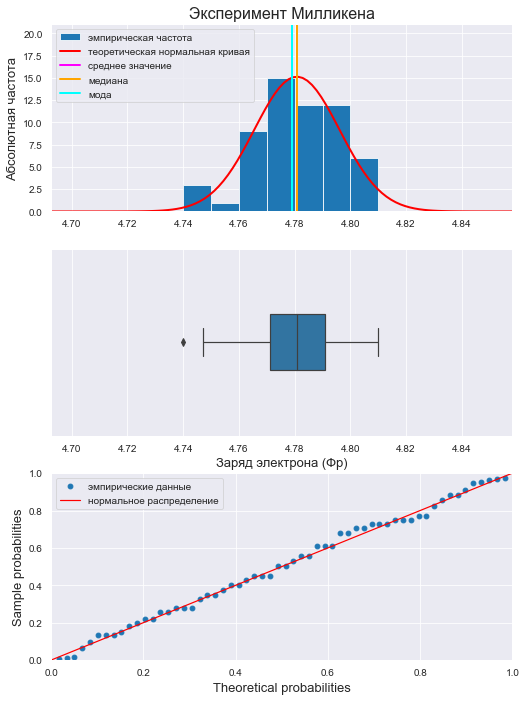

In [81]:
graph_hist_boxplot_probplot_sns(
    data=X,
    graph_inclusion='hbp',
    title_axes='Эксперимент Милликена', title_axes_fontsize=16,
    data_label='Заряд электрона (Фр)')    

In [82]:
Epps_Pulley_test(X, p_level=0.95)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.8727,True,0.0296,0.3756,True,gaussian distribution


Видим, что рассчитанные нами параметры практически совпадают с примером в первоисточнике ([3, с.143]):
* расчетное значение уровня значимости: наш результат **a_calc = 0.8727**, результат в первоисточнике **0.872**;
* расчетное значение статистики критерия Эппса-Палли: наш результат **statistic = 0.0296**, результат в первоисточнике **0.0296**.

Гипотеза о нормальном распределении исходных данных ПРИНИМАЕТСЯ.

##### <center> <font size="4"> ***ЭКСПЕРИМЕНТ МАЙКЕЛЬСОНА***

Рассмотрим результаты измерения скорости света, полученные Альбертом Майкельсоном, (км/ч) [3, с.139, табл.5.3]:

In [83]:
X = 299000 + np.array([
     850, 1000,  960,  830,  880,  880,  890,  910,  890,  870,
     740,  980,  940,  790,  880,  910,  810,  920,  840,  870,
     900,  930,  960,  810,  880,  850,  810,  890,  780,  810,
    1070,  650,  940,  880,  860,  870,  820,  860,  810,  740,
     930,  760,  880,  880,  720,  840,  800,  880,  760,  810,
     850,  810,  800,  830,  720,  840,  770,  720,  810,  940,
     950, 1000,  850,  800,  620,  850,  760,  840,  790,  950,
     980, 1000,  880,  790,  860,  840,  740,  850,  810,  800,
     980,  960,  900,  760,  970,  840,  750,  850,  820,  810,
     880,  960,  840,  800,  950,  840,  760,  780,  850,  870            
    ])
print(X)

[299850 300000 299960 299830 299880 299880 299890 299910 299890 299870
 299740 299980 299940 299790 299880 299910 299810 299920 299840 299870
 299900 299930 299960 299810 299880 299850 299810 299890 299780 299810
 300070 299650 299940 299880 299860 299870 299820 299860 299810 299740
 299930 299760 299880 299880 299720 299840 299800 299880 299760 299810
 299850 299810 299800 299830 299720 299840 299770 299720 299810 299940
 299950 300000 299850 299800 299620 299850 299760 299840 299790 299950
 299980 300000 299880 299790 299860 299840 299740 299850 299810 299800
 299980 299960 299900 299760 299970 299840 299750 299850 299820 299810
 299880 299960 299840 299800 299950 299840 299760 299780 299850 299870]


Сохраняем данные в **csv**-файл:

In [84]:
np.savetxt('data/Michelson_Experiment.csv', X)

Выполним предварительную визуализацию:

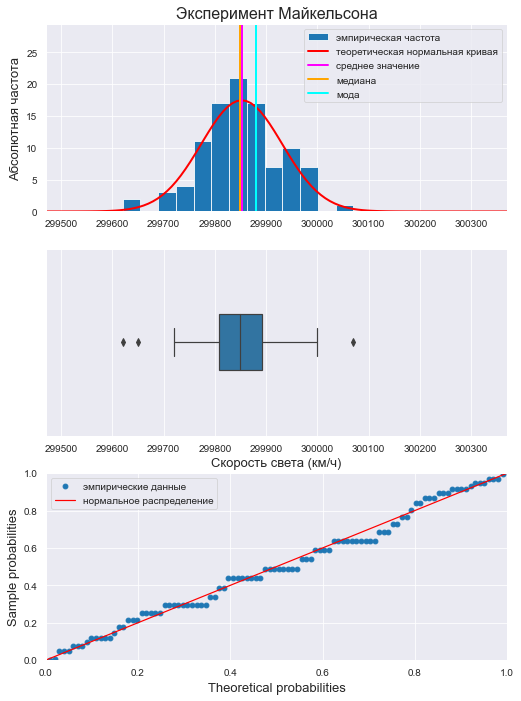

In [85]:
graph_hist_boxplot_probplot_sns(
    data=X,
    data_min=min(X)*0.9995, data_max=max(X)*1.001,
    graph_inclusion='hbp',
    title_axes='Эксперимент Майкельсона', title_axes_fontsize=16,
    data_label='Скорость света (км/ч)')    

In [86]:
Epps_Pulley_test(X, p_level=0.95)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.6060,True,0.0742,0.3760,True,gaussian distribution


Видим, что рассчитанные нами параметры практически совпадают с примером в первоисточнике ([3, с.144]):
* расчетное значение уровня значимости: наш результат **a_calc = 0.6060**, результат в первоисточнике **0.607**;
* расчетное значение статистики критерия Эппса-Палли: наш результат **statistic = 0.0742**, результат в первоисточнике **0.0742**.
  
Гипотеза о нормальном распределении исходных данных ПРИНИМАЕТСЯ.

##### <center> <font size="4"> ***ЭКСПЕРИМЕНТ НЬЮКОМБА***

Рассмотрим результаты измерения скорости света, полученные Саймоном Ньюкомбом, (миллионные доли секунды) [3, с.139, табл.5.4]:

In [87]:
X = 24.8 + 10**-3 * np.array([
    28,  26,  33,  24,  34, -44, 27,  16,  40,  -2,
    29,  22,  24,  21,  25,  30,  23,  29,  31,  19,
    24,  20,  36,  32,  36,  28,  25,  21,  28,  29,
    37,  25,  28,  26,  30,  32,  36,  26,  30,  22,
    36,  23,  27,  27,  28,  27,  31,  27,  26,  33,
    26,  32,  32,  24,  39,  28,  24,  25,  32,  25,
    29,  27,  28,  29,  16,  23                
    ])
print(X)

[24.8280 24.8260 24.8330 24.8240 24.8340 24.7560 24.8270 24.8160 24.8400
 24.7980 24.8290 24.8220 24.8240 24.8210 24.8250 24.8300 24.8230 24.8290
 24.8310 24.8190 24.8240 24.8200 24.8360 24.8320 24.8360 24.8280 24.8250
 24.8210 24.8280 24.8290 24.8370 24.8250 24.8280 24.8260 24.8300 24.8320
 24.8360 24.8260 24.8300 24.8220 24.8360 24.8230 24.8270 24.8270 24.8280
 24.8270 24.8310 24.8270 24.8260 24.8330 24.8260 24.8320 24.8320 24.8240
 24.8390 24.8280 24.8240 24.8250 24.8320 24.8250 24.8290 24.8270 24.8280
 24.8290 24.8160 24.8230]


Сохраняем данные в **csv**-файл:

In [88]:
np.savetxt('data/Newcomb_Experiment.csv', X)

Выполним предварительную визуализацию:

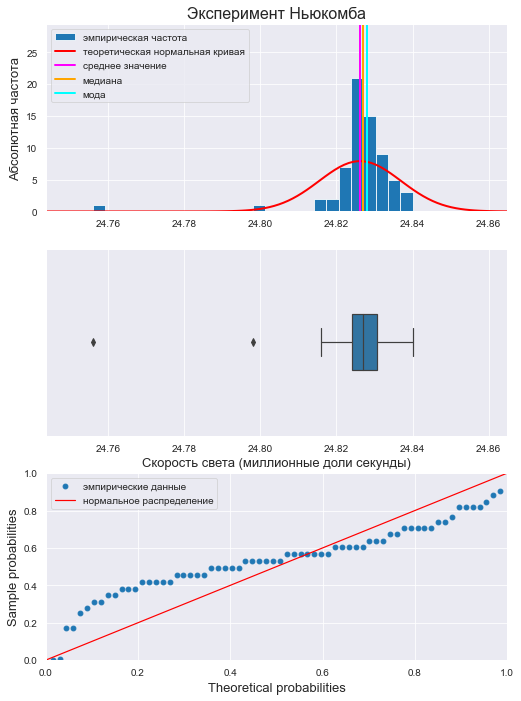

In [89]:
graph_hist_boxplot_probplot_sns(
    data=X,
    data_min=min(X)*0.9995, data_max=max(X)*1.001,
    graph_inclusion='hbp',
    title_axes='Эксперимент Ньюкомба', title_axes_fontsize=16,
    data_label='Скорость света (миллионные доли секунды)')    

Видим, что в выборке присутствуют очевидно аномальные значения (выбросы), искажающие результат. 
Гипотеза о нормальном распределении исходных данных ОТВЕРГАЕТСЯ:

In [90]:
Epps_Pulley_test(X, p_level=0.95)

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.0000,False,4.1207,0.3760,False,not gaussian distribution


Исключим аномальные значения (выбросы) и повторим процедуру:

In [91]:
mask = (X >= 24.81)
X = X[mask]
print(X)

[24.8280 24.8260 24.8330 24.8240 24.8340 24.8270 24.8160 24.8400 24.8290
 24.8220 24.8240 24.8210 24.8250 24.8300 24.8230 24.8290 24.8310 24.8190
 24.8240 24.8200 24.8360 24.8320 24.8360 24.8280 24.8250 24.8210 24.8280
 24.8290 24.8370 24.8250 24.8280 24.8260 24.8300 24.8320 24.8360 24.8260
 24.8300 24.8220 24.8360 24.8230 24.8270 24.8270 24.8280 24.8270 24.8310
 24.8270 24.8260 24.8330 24.8260 24.8320 24.8320 24.8240 24.8390 24.8280
 24.8240 24.8250 24.8320 24.8250 24.8290 24.8270 24.8280 24.8290 24.8160
 24.8230]


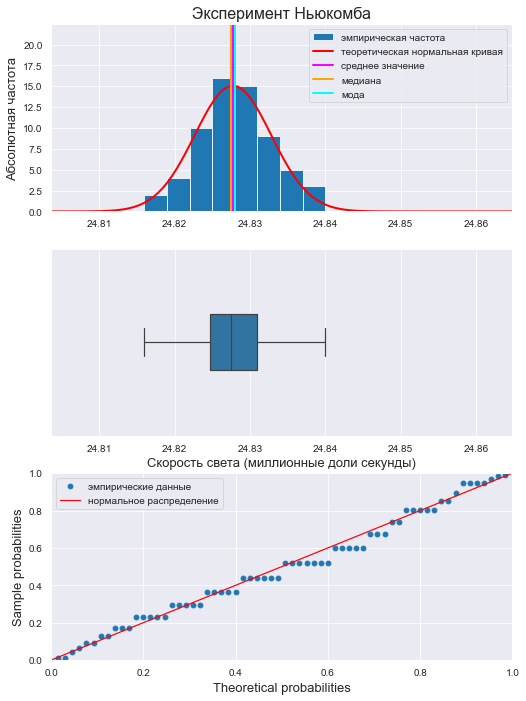

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.4539,True,0.1074,0.3760,True,gaussian distribution


In [92]:
graph_hist_boxplot_probplot_sns(
    data=X,
    data_min=min(X)*0.9995, data_max=max(X)*1.001,
    graph_inclusion='hbp',
    title_axes='Эксперимент Ньюкомба', title_axes_fontsize=16,
    data_label='Скорость света (миллионные доли секунды)')    

Epps_Pulley_test(X, p_level=0.95)

Видим, что после исключения выбросов рассчитанные нами параметры практически совпадают с примером в первоисточнике ([3, с.144]):
* расчетное значение уровня значимости: наш результат **a_calc = 0.4539**, результат в первоисточнике **0.461**;
* расчетное значение статистики критерия Эппса-Палли: наш результат **statistic = 0.1074**, результат в первоисточнике **0.1074**.
  
Гипотеза о нормальном распределении исходных данных ПРИНИМАЕТСЯ.

##### <center> <font size="4"> ***ПРИМЕР ИЗ ГОСТ Р ИСО 5479-2002***

Разберем также пример из ГОСТ Р ИСО 5479-2002 - результаты измерения прочности вискозной нити (в условных единицах) [1, с.14, пример 5]:

In [93]:
X = np.array([
    147, 186, 141, 183, 190, 123, 155, 164, 183, 150,
    134, 170, 144,  99, 156, 176, 160, 174, 153, 162,
    167, 179,  78, 173, 168 
    ])

Сохраняем данные в **csv**-файл:

In [94]:
np.savetxt('data/viscose_thread.csv', X)

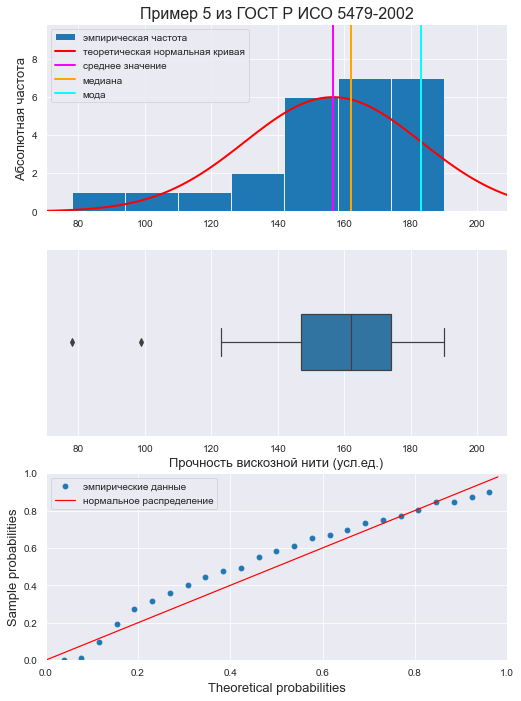

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.0051,False,0.6115,0.3700,False,not gaussian distribution


In [95]:
graph_hist_boxplot_probplot_sns(
    data=X,
    data_min=min(X)*0.9, data_max=max(X)*1.1,
    graph_inclusion='hbp',
    title_axes='Пример 5 из ГОСТ Р ИСО 5479-2002', title_axes_fontsize=16,
    data_label='Прочность вискозной нити (усл.ед.)')    

Epps_Pulley_test(X, p_level=0.95)

Видим, что закон распределения исходные данных явно отличается от нормального.

Расчетное значение статистики критерия Эппса-Палли практически совпадает с примером в первоисточнике ([1, с.14]): наш результат **statistic = 0.6115**, результат в первоисточнике **0.612**.
  
Гипотеза о нормальном распределении исходных данных ОТВЕРГАЕТСЯ.

Преобразуем исходные данные и повторим процедуру:

In [96]:
X2 = [log10(204 - elem) for elem in X]
print(X2)

[1.7558748556724915, 1.255272505103306, 1.7993405494535817, 1.3222192947339193, 1.146128035678238, 1.9084850188786497, 1.6901960800285136, 1.6020599913279623, 1.3222192947339193, 1.7323937598229686, 1.845098040014257, 1.5314789170422551, 1.7781512503836436, 2.0211892990699383, 1.6812412373755872, 1.4471580313422192, 1.6434526764861874, 1.4771212547196624, 1.7075701760979363, 1.6232492903979006, 1.568201724066995, 1.3979400086720377, 2.100370545117563, 1.4913616938342726, 1.5563025007672873]


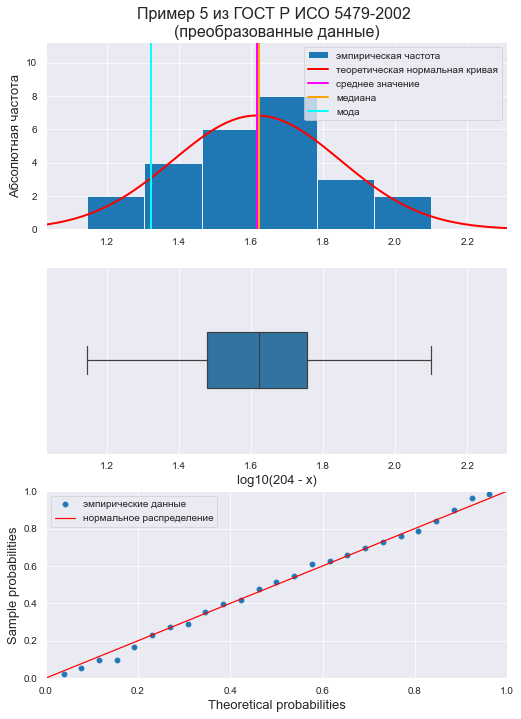

,test,p_level,a_level,a_calc,a_calc >= a_level,statistic,critical_value,statistic < critical_value,conclusion
1,Epps-Pulley test,0.9500,0.0500,0.9938,True,0.0058,0.3700,True,gaussian distribution


In [97]:
graph_hist_boxplot_probplot_sns(
    data=X2,
    data_min=min(X2)*0.9, data_max=max(X2)*1.1,
    graph_inclusion='hbp',
    title_axes='Пример 5 из ГОСТ Р ИСО 5479-2002 \n(преобразованные данные)', title_axes_fontsize=16,
    data_label='log10(204 - x)')    

Epps_Pulley_test(X2, p_level=0.95)

Расчетное значение статистики критерия Эппса-Палли практически совпадает с примером в первоисточнике ([1, с.14]): наш результат **statistic = 0.0058**, результат в первоисточнике **0.006**.
  
После преобразования результат меняется - гипотеза о нормальном распределении исходных данных ПРИНИМАЕТСЯ.

### <center> <u> <font size="5"> ***ИТОГИ***

Итак, мы рассмотрели способы реализации критерия Эппса-Палли средствами **python**, разобрали подход к определению расчетного уровня значимости, который можно использовать при реализации других статистических критериев, отсутствующих в наборе стандартных функций **python**, также предложены пользовательские функции, уменьшающие размер кода. Кроме того, выполнено тестирование математических расчетов альтернативным способом - в системе компьютерной алгебры **Maxima**.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods/tree/master/Epps-Pally%20test).

Отдельную благодарность хочу выразить профессору Новосибирского государственного технического университета Борису Юрьевичу Лемешко, методические разработки которого использовались при написании данного разбора - за отклик, ответы на вопросы и комментарии, данные по электронной почте.

### <center> <u> <font size="5"> ***ЛИТЕРАТУРА***

1. ГОСТ Р ИСО 5479-2002. Статистические методы. Проверка отклонения распределения вероятностей от нормального распределения.
2. Лемешко Б.Ю. и др. Статистический анализ данных, моделирование и исследование вероятностных закономерностей. Компьютерный подход. - Новосибирск: Изд-во НГТУ, 2011. - 888 с.
3. Лемешко Б.Ю. Критерии проверки отклонения распределения от нормального закона. Руководство по применению. - Новосибирск: Изд-во НГТУ, 2014. - 192 с.
4. Хан Г., Шапиро С. Статистические модели в инженерных задачах / пер. с англ. - М.: Мир, 1969. - 395 с.
5. Айвазян С.А. и др. Прикладная статистика: основы моделирования и первичная обработка данных. - М.: Финансы и статистика, 1983. - 471 с.
6. Джонсон Н.Л. и др. Одномерные непрерывные распределения. В 2-х ч. - Ч.2 / пер. с англ. - М.: БИНОМ. Лаборатория знаний, 2012. - 600 с.
7. Постовалов С.Н. Статистический анализ интервальных наблюдений одномерных непрерывных случайных величин: дис. ... канд.тех.наук 05.13.16. - Новосибирск.гос.тех.ун-т: Новосибирск, 1997. - 188 с.
8. Губарев В.В. Вероятностные модели: Справочник. В 2-х ч. - Ч.1. - Новосиб. электротех. ин-т: Новосибирск, 1992. - 198 с.

In [98]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time, 3)} c")

Общее время выполнения расчетов: 25221.678 c
